## Imports

In [2]:
from sklearn import datasets

## Dataset

For this SVM example, we will be using the default breast cancer dataset from `sklearn` package. This binary dataset contains 30 features and 569 samples.

In [3]:
cancer = datasets.load_breast_cancer()
print(cancer.data.shape)

(569, 30)


We can take a look at the features and our target variable.

In [4]:
print("Features: ", cancer.feature_names)
print("Target: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target:  ['malignant' 'benign']


Taking a look at our features:

In [5]:
print(cancer.data[0:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


And our target variable:

We can take a quick look at our features. We can start with the first two features: `mean_texture` vs `mean_radius`. We can see that there can be a linear distinction between the two.

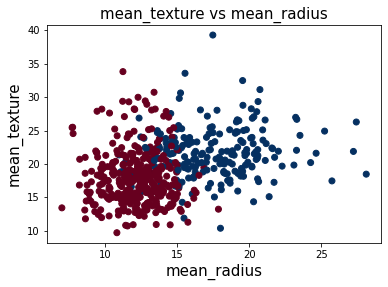

In [6]:
import matplotlib.pyplot as plt

plt.scatter(cancer.data[:, 0], cancer.data[:, 1], c = cancer.target, cmap=plt.cm.get_cmap('RdBu_r'))
plt.xlabel('mean_radius',size=15)
plt.ylabel('mean_texture',size=15)
plt.title("mean_texture vs mean_radius",size=15)
plt.show()

## Splitting data

We will be leveraging the `train_test_split` to split our dataset. We could also do this manually by slicing our dataset after sampling. We will split 80/20 train/test. 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,random_state=109)

## Modeling

Sklearn has a built in `svm` model. Since this is an easy binary dataset, we can just use a linear kernal. For more complex, a polynomial kernal can be considered. 

In [9]:
from sklearn import svm

classifer = svm.SVC(kernel='linear')
#Model Train
classifer.fit(X_train, y_train)

#Predict on test
y_pred = classifer.predict(X_test)

## Model Metrics

Our SVM has an accuracy of 95%. Our precision is 98% and our recall is 94% which tells us our model is performing well.

In [10]:
from sklearn import metrics

# Model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.956140350877193
Precision: 0.9859154929577465
Recall: 0.9459459459459459
